# Topic Modeling

Udacity code are used as template.

In [1]:
import os
import pandas as pd
import numpy as np

### prepare raw data

In [2]:
data_dir = "/Users/jenny.yang/OneDrive - Shell/Documents/Kaggle_COVID19/Data/"

In [4]:
meta = pd.read_csv(data_dir + "metadata.csv")
print(meta.shape)

(51078, 18)


In [5]:
meta.head(2)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...


In [6]:
### first filter by meta file.
meta["publish_time"] = pd.to_datetime(meta["publish_time"])
meta["publish_year"] = (pd.DatetimeIndex(meta['publish_time']).year)
meta["publish_month"] = (pd.DatetimeIndex(meta['publish_time']).month)
meta = meta[meta["publish_year"] == 2020]

In [14]:
print(meta.shape)

(5330, 20)


In [16]:
len(meta.iloc[1, 8])

307

In [40]:
#count how many has abstract
count = 0
index = []
for i in range(len(meta)):
    #print(i)
    if type(meta.iloc[i, 8])== float:
        count += 1
    else:
        index.append(i)

print(count)

1383


In [41]:
##only use paper with abstract
len(index)

3947

In [53]:
##extract the abstract to pandas 
documents = meta.iloc[index, 8]

In [54]:
documents=documents.reset_index()

In [55]:
documents.head(2)

,index,abstract
0,11828,Diabetes mellitus and hypertension are recogni...
1,11829,We detected bovine kobuvirus (BKV) in calves w...


In [56]:
documents.drop("index", inplace = True, axis = 1)

In [58]:
documents["index"] = documents.index.values

In [59]:
documents.head(3)

,abstract,index
0,Diabetes mellitus and hypertension are recogni...,0
1,We detected bovine kobuvirus (BKV) in calves w...,1
2,We examined nasal swabs and serum samples acqu...,2


### 2 data processing

In [65]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
stemmer = SnowballStemmer("english")

In [61]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jenny.yang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [66]:
##lemmatize and stemming

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # TODO: Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result


In [67]:
##test
document_num = 1000
doc_sample = documents[documents["index"] == document_num].values[0][0]

In [68]:
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['Abstract', 'Context', 'The', 'COVID-19', 'pandemic', 'created', 'a', 'rapid', 'and', 'unprecedented', 'shift', 'in', 'our', 'medical', 'system.', 'Medical', 'providers,', 'teams,', 'and', 'organizations', 'have', 'needed', 'to', 'shift', 'their', 'visits', 'away', 'from', 'face-to-face', 'visits', 'and', 'toward', 'telehealth', '(both', 'by', 'phone', 'and', 'through', 'video).', 'Palliative', 'care', 'teams', 'who', 'practice', 'in', 'the', 'community', 'setting', 'are', 'faced', 'with', 'a', 'difficult', 'task:', 'How', 'do', 'we', 'actively', 'triage', 'the', 'most', 'urgent', 'visits', 'while', 'keeping', 'our', 'vulnerable', 'patients', 'safe', 'from', 'the', 'pandemic?', 'Measures', 'The', 'following', 'are', 'recommendations', 'created', 'by', 'the', 'Palo', 'Alto', 'Medical', 'Foundation', 'Palliative', 'Care', 'and', 'Support', 'Services', 'team', 'to', 'help', 'triage', 'and', 'coordinate', 'for', 'timely,', 'safe,', 'and', 'effective', 'palliative', 'ca

In [69]:
documents.head(3)

,abstract,index
0,Diabetes mellitus and hypertension are recogni...,0
1,We detected bovine kobuvirus (BKV) in calves w...,1
2,We examined nasal swabs and serum samples acqu...,2


In [70]:
##preprocess documents abstract column
processed_docs = documents['abstract'].map(preprocess)

In [71]:
processed_docs[:10]

0    [diabet, mellitus, hypertens, recogn, risk, fa...
1    [detect, bovin, kobuvirus, calv, diarrhea, uni...
2    [examin, nasal, swab, serum, sampl, acquir, dr...
3    [influenza, virus, potenti, caus, respiratori,...
4    [cetuximab, improv, surviv, patient, metastat,...
5    [decad, monoclon, antibodi, approv, unit, stat...
6    [today, treatment, bacteri, infect, major, cha...
7    [background, human, metapneumovirus, hmpv, imp...
8    [abstract, miracl, trial, mer, infect, treat, ...
9    [modern, societi, expos, myriad, risk, rang, d...
Name: abstract, dtype: object

## 3 bag of words on the dataset

In [72]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [74]:
len(dictionary)

14429

In [73]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 arabia
1 associ
2 clinic
3 close
4 condit
5 coronavirus
6 correspond
7 death
8 diabet
9 east
10 factor


In [75]:
##remove extreme words (very common and very rare)
dictionary.filter_extremes(no_below=15, no_above=0.1)

In [76]:
##create bag-of-word model for each documents
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [77]:
bow_corpus[document_num]

[(10, 1),
 (181, 4),
 (191, 2),
 (211, 1),
 (219, 1),
 (220, 1),
 (244, 1),
 (292, 1),
 (297, 1),
 (330, 1),
 (346, 2),
 (359, 1),
 (361, 1),
 (377, 1),
 (446, 3),
 (454, 1),
 (458, 1),
 (482, 1),
 (486, 1),
 (512, 1),
 (534, 4),
 (543, 2),
 (566, 1),
 (573, 1),
 (582, 3),
 (602, 1),
 (620, 2),
 (710, 1),
 (849, 1),
 (851, 3),
 (898, 1),
 (939, 1),
 (947, 1),
 (975, 1),
 (1022, 1),
 (1031, 1),
 (1084, 2),
 (1122, 1),
 (1228, 1),
 (1289, 1),
 (1320, 1),
 (1422, 2),
 (1450, 1),
 (1462, 2),
 (1463, 4),
 (1530, 1),
 (1536, 1),
 (1837, 1)]

In [79]:
bow_doc_4310 = bow_corpus[document_num]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 10 ("multipl") appears 1 time.
Word 181 ("set") appears 4 time.
Word 191 ("design") appears 2 time.
Word 211 ("support") appears 1 time.
Word 219 ("communic") appears 1 time.
Word 220 ("context") appears 1 time.
Word 244 ("learn") appears 1 time.
Word 292 ("frequent") appears 1 time.
Word 297 ("initi") appears 1 time.
Word 330 ("crucial") appears 1 time.
Word 346 ("screen") appears 2 time.
Word 359 ("deliv") appears 1 time.
Word 361 ("difficult") appears 1 time.
Word 377 ("ongo") appears 1 time.
Word 446 ("face") appears 3 time.
Word 454 ("locat") appears 1 time.
Word 458 ("organ") appears 1 time.
Word 482 ("guidelin") appears 1 time.
Word 486 ("maintain") appears 1 time.
Word 512 ("help") appears 1 time.
Word 534 ("communiti") appears 4 time.
Word 543 ("recommend") appears 2 time.
Word 566 ("equip") appears 1 time.
Word 573 ("person") appears 1 time.
Word 582 ("team") appears 3 time.
Word 602 ("famili") appears 1 time.
Word 620 ("safe") appears 2 time.
Word 710 ("thorough") appea

### 3.2 TF-IDF

In [80]:
from gensim import corpora, models
#tfidf = # TODO
tfidf = models.TfidfModel(bow_corpus)

In [81]:
corpus_tfidf = tfidf[bow_corpus]

In [82]:
##preview
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.35010075989000167),
 (1, 0.18684054739847109),
 (2, 0.19267453198919854),
 (3, 0.25956174363610257),
 (4, 0.2671209268243568),
 (5, 0.22469568206143628),
 (6, 0.2917165598339723),
 (7, 0.27834751937482777),
 (8, 0.1943534792734007),
 (9, 0.2077270875590725),
 (10, 0.18336543350016205),
 (11, 0.17845533155687388),
 (12, 0.24360370781665938),
 (13, 0.2720805833579731),
 (14, 0.34508200985963433),
 (15, 0.23401165060982926)]


## 4 running LDA

In [88]:
import datetime

In [90]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=5, 
                                       id2word = dictionary, 
                                       passes = 50, 
                                       workers=4) 

now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2020-04-11 11:48:58
2020-04-11 11:50:53


In [91]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.017*"immun" + 0.014*"vaccin" + 0.014*"express" + 0.009*"induc" + 0.007*"gene" + 0.007*"assay" + 0.007*"lung" + 0.007*"mechan" + 0.007*"replic" + 0.006*"function"


Topic: 1 
Words: 0.008*"citi" + 0.008*"social" + 0.007*"hubei" + 0.007*"intervent" + 0.007*"travel" + 0.007*"march" + 0.006*"individu" + 0.006*"quarantin" + 0.006*"contact" + 0.005*"impact"


Topic: 2 
Words: 0.012*"sampl" + 0.008*"recommend" + 0.007*"healthcar" + 0.007*"influenza" + 0.006*"evid" + 0.006*"staff" + 0.006*"research" + 0.006*"trial" + 0.006*"practic" + 0.005*"support"


Topic: 3 
Words: 0.018*"sequenc" + 0.017*"genom" + 0.015*"drug" + 0.014*"bind" + 0.013*"mer" + 0.013*"structur" + 0.012*"host" + 0.010*"vaccin" + 0.010*"target" + 0.009*"receptor"


Topic: 4 
Words: 0.012*"fever" + 0.011*"chest" + 0.010*"imag" + 0.009*"lung" + 0.009*"outcom" + 0.008*"admiss" + 0.008*"median" + 0.008*"children" + 0.008*"blood" + 0.008*"mortal"




### LDA model topics identification

1. immunology aspect
2. hubei social, individual quarantin
3. healthcare, recommendation
4. genomic sequence
5. symptoms (fever, chest image) + admision

## LFA + TF-IDF

In [92]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=5, 
                                             id2word = dictionary, 
                                             passes = 50, 
                                             workers=4)
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2020-04-11 11:53:44
2020-04-11 11:56:02


In [93]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.017*"cytokin" + 0.013*"inflammatori" + 0.011*"calv" + 0.011*"induc" + 0.009*"storm" + 0.008*"stress" + 0.008*"skin" + 0.007*"immun" + 0.007*"injuri" + 0.007*"damag"


Topic: 1 Word: 0.007*"chest" + 0.007*"lung" + 0.007*"children" + 0.007*"fever" + 0.007*"imag" + 0.005*"outcom" + 0.005*"swab" + 0.005*"blood" + 0.005*"admiss" + 0.005*"featur"


Topic: 2 Word: 0.007*"sequenc" + 0.007*"drug" + 0.007*"genom" + 0.007*"vaccin" + 0.006*"host" + 0.006*"bind" + 0.005*"structur" + 0.005*"antivir" + 0.005*"receptor" + 0.005*"target"


Topic: 3 Word: 0.012*"cancer" + 0.010*"depart" + 0.010*"surgeri" + 0.009*"staff" + 0.008*"guidelin" + 0.008*"oper" + 0.007*"disinfect" + 0.006*"situat" + 0.006*"recommend" + 0.006*"surgic"


Topic: 4 Word: 0.004*"citi" + 0.004*"travel" + 0.004*"hubei" + 0.004*"social" + 0.004*"march" + 0.003*"intervent" + 0.003*"contact" + 0.003*"quarantin" + 0.003*"reproduct" + 0.003*"individu"




### compare matrix difference between two models

In [94]:
mdiff, annotation = lda_model.diff(lda_model_tfidf)
topic_diff = mdiff  

In [95]:
topic_diff

array([[0.41406387, 0.7359991 , 0.22164941, 0.761245  , 0.90195649],
       [0.59767353, 0.69907914, 0.70902944, 0.53016881, 0.06019198],
       [0.62867627, 0.52674808, 0.65405578, 0.32436269, 0.32722053],
       [0.73222116, 1.        , 0.10605286, 0.81972645, 0.88494695],
       [0.71174541, 0.07770946, 0.99460011, 0.86685825, 0.85212084]])

## get each documents' topic

In [112]:
output = (lda_model.get_document_topics(bow_corpus[1]))

In [115]:
output[0][1], output[1][1], output[2][1], output[3][1], output[4][1]

(0.9232785, 0.019755574, 0.019583412, 0.018742858, 0.018639661)

In [175]:
documents_lda_topics = pd.DataFrame(columns = ["topic1", "topic2", "topic3", "topic4", "topic5"])
documents_lda_tfidf_topics = pd.DataFrame(columns = ["topic1", "topic2", "topic3", "topic4", "topic5"])
for i in range(len(bow_corpus)):
    if i % 500 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5
    documents_lda_tfidf_topics.loc[i] = [0] * 5
    
    output = lda_model.get_document_topics(bow_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b
    
    output_tfidf = lda_model_tfidf.get_document_topics(bow_corpus[i])
    for k in range(len(output_tfidf)):
        a = output_tfidf[k][0]
        b = output_tfidf[k][1]
        documents_lda_tfidf_topics.iloc[i, a] = b

0
500
1000
1500
2000
2500
3000
3500


In [176]:
print(documents_lda_topics.shape)
print(documents_lda_tfidf_topics.shape)

(3947, 5)
(3947, 5)


In [177]:
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)

In [182]:
documents_lda_topics["final_topic"] =documents_lda_topics.idxmax(axis=1)

In [183]:
documents_lda_topics.head(3)

,topic1,topic2,topic3,topic4,topic5,final_topic
0,0.011909,0.011938,0.012008,0.394053,0.570094,topic5
1,0.923289,0.019745,0.019584,0.018743,0.018640,topic1
2,0.237836,0.014357,0.718561,0.014528,0.014718,topic3


In [185]:
for i in range(5):
    documents_lda_tfidf_topics.iloc[:, i] = documents_lda_tfidf_topics.iloc[:, i].astype('float64', copy=False)

In [186]:
documents_lda_tfidf_topics["final_topic"] =documents_lda_tfidf_topics.idxmax(axis=1)

In [187]:
documents_lda_tfidf_topics.head(3)

,topic1,topic2,topic3,topic4,topic5,final_topic
0,0.011821,0.554458,0.012053,0.011907,0.409760,topic2
1,0.204122,0.018741,0.739142,0.018488,0.019507,topic3
2,0.014294,0.942163,0.014585,0.014345,0.014613,topic2


## topic cluster visualization

In [155]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [188]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(documents_lda_topics.iloc[:, :5])

In [189]:
pca.explained_variance_ratio_

array([0.38657181, 0.24582262, 0.20543145])

In [199]:
pca_df.head(4)

,pca-one,pca-two,pca-three,topic
0,-0.356017,0.103585,0.377135,black
1,-0.326098,0.163369,0.082516,red
2,-0.307249,-0.393227,-0.378136,green
3,-0.207405,0.153623,0.076660,red


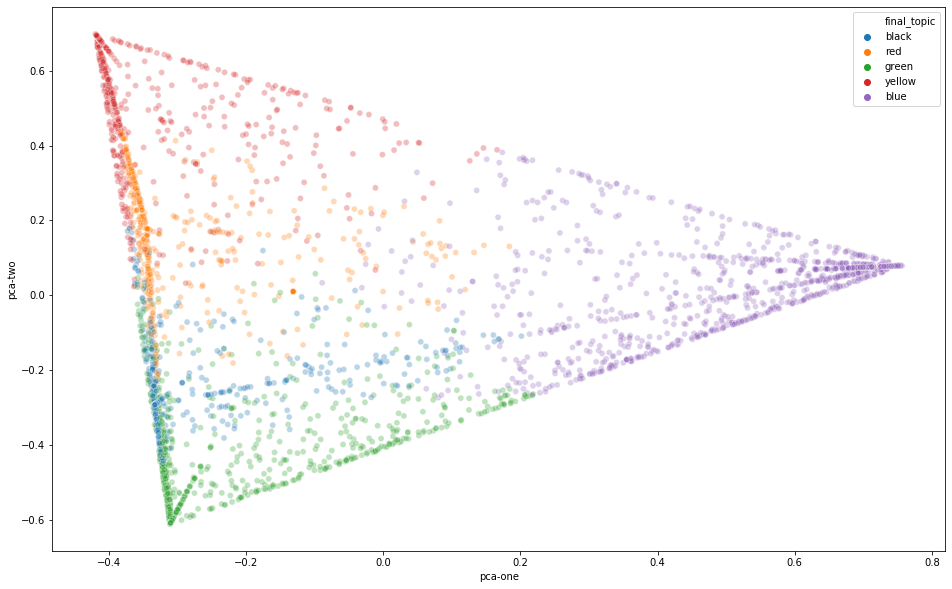

In [201]:
pca_df = pd.DataFrame()
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df["pca-three"] = pca_result[:, 2]
pca_df["topic"] = documents_lda_topics.iloc[:, 5].replace({"topic1": "red", "topic2": "blue", "topic3": "green", "topic4": "yellow", "topic5": "black"})
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue= documents_lda_topics.iloc[:, 5].replace({"topic1": "red", "topic2": "blue", "topic3": "green", "topic4": "yellow", "topic5": "black"}),
    data=pca_df,
    legend="full",
    alpha=0.3
)

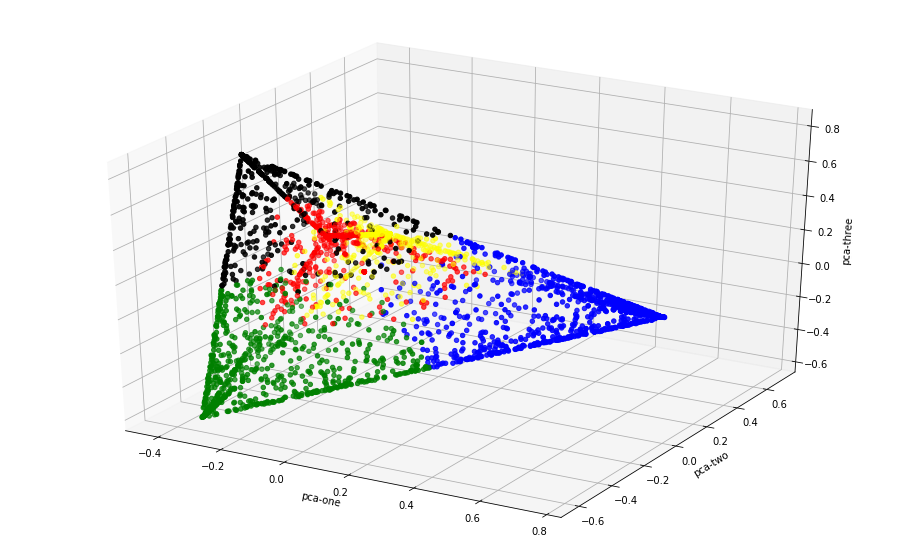

In [202]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df["pca-one"], 
    ys=pca_df["pca-two"], 
    zs=pca_df["pca-three"], 
    cmap='tab10',
    c = documents_lda_topics.iloc[:, 5].replace({"topic1": "red", "topic2": "blue", "topic3": "green", "topic4": "yellow", "topic5": "black"})
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [160]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(documents_lda_topics)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3947 samples in 0.008s...
[t-SNE] Computed neighbors for 3947 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3947
[t-SNE] Computed conditional probabilities for sample 2000 / 3947
[t-SNE] Computed conditional probabilities for sample 3000 / 3947
[t-SNE] Computed conditional probabilities for sample 3947 / 3947
[t-SNE] Mean sigma: 0.002238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.904789
[t-SNE] KL divergence after 300 iterations: 1.122780


In [162]:
tsne_df = pd.DataFrame()

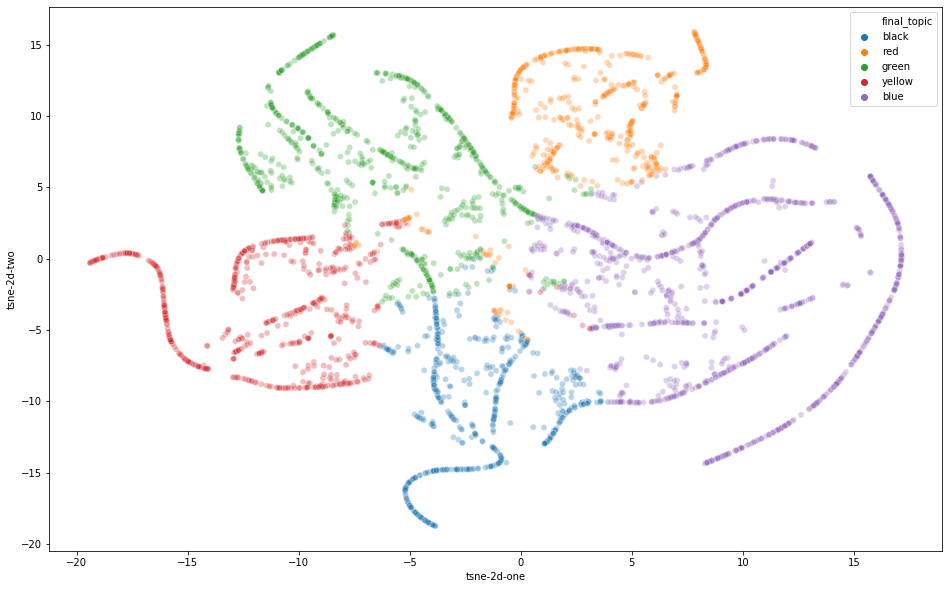

In [203]:
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=documents_lda_topics.iloc[:, 5].replace({"topic1": "red", "topic2": "blue", "topic3": "green", "topic4": "yellow", "topic5": "black"}),
    #palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)